In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [74]:
df = pd.read_csv('BeerWineLiquor.csv')

In [75]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [76]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [78]:
df.isnull().sum()

date    0
beer    0
dtype: int64

In [79]:
df.shape

(324, 2)

In [80]:
df['date'] = pd.to_datetime(df['date'])

In [81]:
df.head()

,date,beer
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [82]:
df.set_index('date',inplace = True)

In [83]:
df.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [84]:
df.describe()

,beer
count,324.000000
mean,2972.895062
std,1010.218574
min,1501.000000
25%,2109.000000
50%,2791.000000
75%,3627.250000
max,6370.000000


<Axes: xlabel='date'>

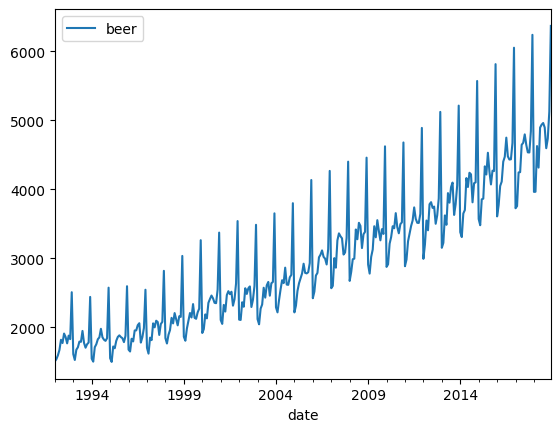

In [85]:
df.plot()

The above data in the plotted graph looks seasonal


In [86]:
from statsmodels.tsa.stattools import adfuller

In [87]:
test_samples_sales = adfuller(df['beer'])

In [88]:
test_samples_sales

(2.864308507897254,
 1.0,
 15,
 308,
 {'1%': -3.45176116018037,
  '5%': -2.870970093607691,
  '10%': -2.571794416006072},
 3570.218090367952)

Null Hypothesis : The sales of beer are not stationary

Alternate Hypothesis : The sales of the beer are stationary

if p value< 0.05 : reject null hypothesis

else : accept null hypothesis


In [89]:
p_value = test_samples_sales[1]

In [90]:
def adfuller_test(p_value):
  if p_value<=0.05:
    print("Null hypothesis rejected")
  else:
    print("Null hypothesis accepted")

In [91]:
adfuller_test(p_value)

Null hypothesis accepted


In [119]:
df['Seasonal_difference'] = df['beer'] - df['beer'].shift(6)

In [120]:
df

,beer,Seasonal_difference
date,,
1992-01-01,1509,NaN
1992-02-01,1541,NaN
1992-03-01,1597,NaN
1992-04-01,1675,NaN
1992-05-01,1822,NaN
...,...,...
2018-08-01,4898,931.0
2018-09-01,4598,-31.0
2018-10-01,4737,420.0


In [135]:
df.iloc[7:]

,beer,Seasonal_difference
date,,
1992-08-01,1862,321.0
1992-09-01,1770,173.0
1992-10-01,1882,207.0
1992-11-01,1831,9.0
1992-12-01,2511,736.0
...,...,...
2018-08-01,4898,931.0
2018-09-01,4598,-31.0
2018-10-01,4737,420.0


In [121]:
test_seasonal_samples = adfuller(df['Seasonal_difference'].dropna())

In [122]:
adfuller_test(test_seasonal_samples[1])

Null hypothesis rejected


In [123]:
test_seasonal_samples[1]

0.0010312699478488712

<Axes: xlabel='date'>

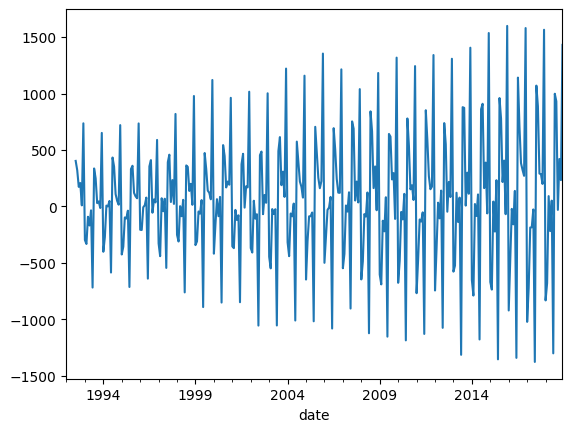

In [124]:
df['Seasonal_difference'].plot()

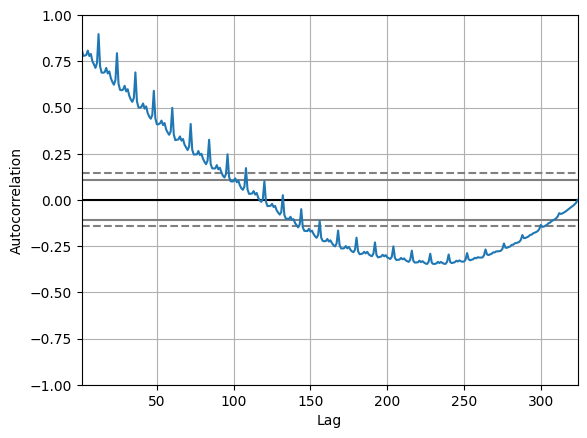

In [128]:
x = pd.plotting.autocorrelation_plot(df['beer'])
x.plot()
plt.show()

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


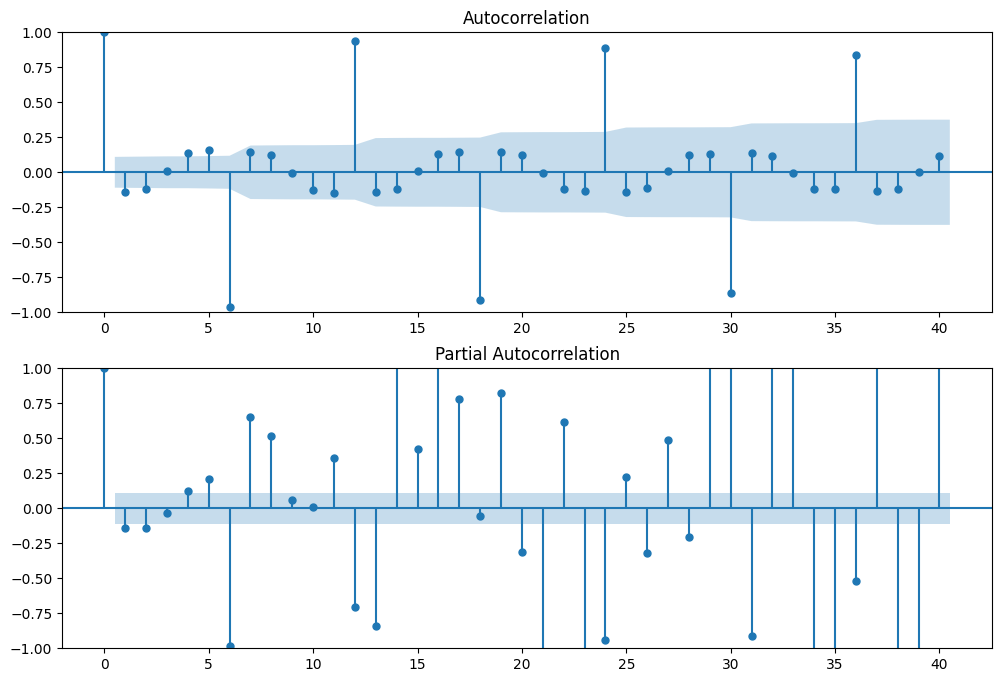

In [136]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal_difference'].iloc[7:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal_difference'].iloc[7:],lags=40,ax=ax2)

In [138]:
import statsmodels.api as sm

In [139]:
model=sm.tsa.statespace.SARIMAX(df['beer'],order=(1, 1, 1),seasonal_order=(1,1,1,6))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<Axes: xlabel='date'>

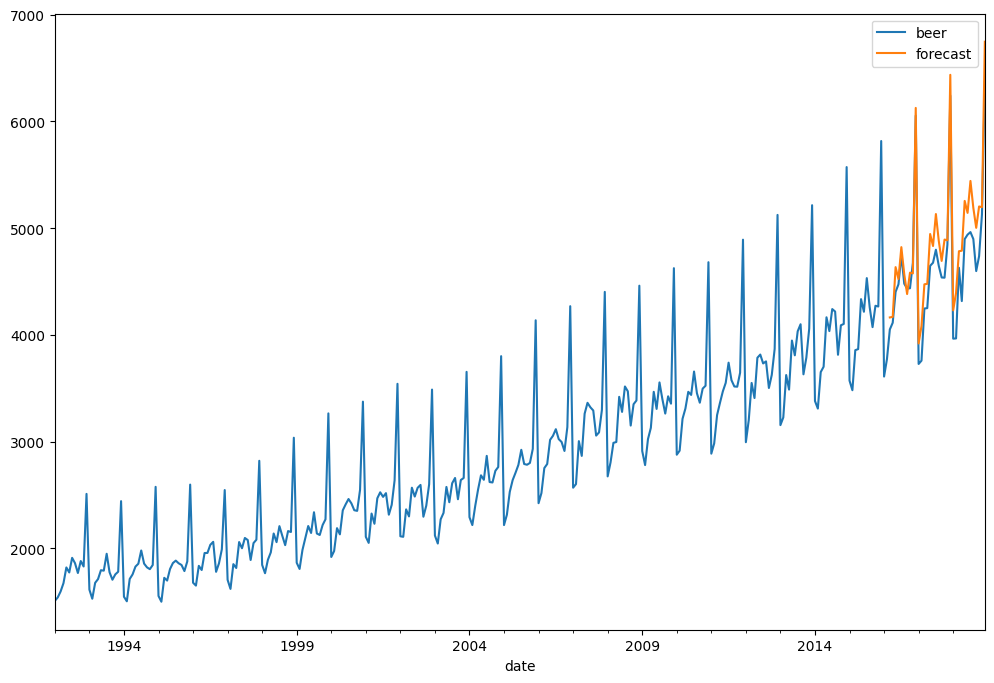

In [140]:
df['forecast']=results.predict(start=290,end=324,dynamic=True)
df[['beer','forecast']].plot(figsize=(12,8))

In [143]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [144]:
future_dates

[Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-

In [145]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [146]:
future_dataset

,beer,Seasonal_difference,forecast
2019-01-01,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN
2019-03-01,NaN,NaN,NaN
2019-04-01,NaN,NaN,NaN
2019-05-01,NaN,NaN,NaN
2019-06-01,NaN,NaN,NaN
2019-07-01,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN


In [147]:
future_df=pd.concat([df,future_dataset])

In [148]:
future_df

,beer,Seasonal_difference,forecast
1992-01-01,1509,NaN,NaN
1992-02-01,1541,NaN,NaN
1992-03-01,1597,NaN,NaN
1992-04-01,1675,NaN,NaN
1992-05-01,1822,NaN,NaN
...,...,...,...
2021-07-01,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN


In [149]:
future_df.shape

(359, 3)

<Axes: >

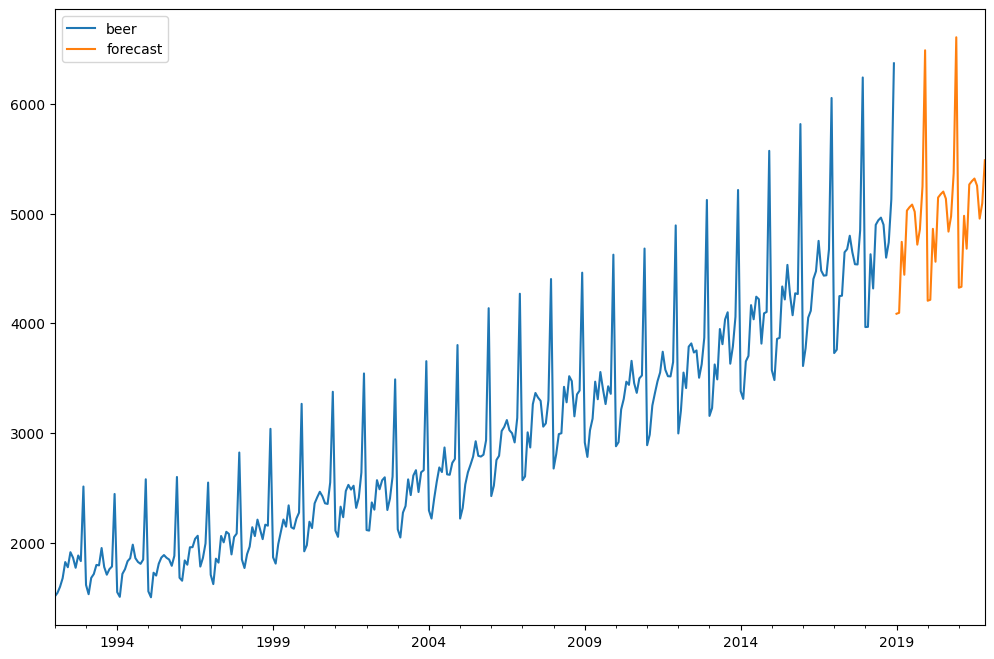

In [154]:
future_df['forecast'] = results.predict(start = 324, end = 359, dynamic= True)
future_df[['beer', 'forecast']].plot(figsize=(12, 8))